In [1]:
data = """
1 100 0 0.000077 1.000010
2 100 0 0.000060 1.000010
3 100 0 0.000060 0.992825
4 100 0 0.000112 1.000010
5 100 0 0.000093 1.000010
6 100 0 0.000249 0.965240
1 1000 0 0.000061 1.000000
2 1000 0 0.000055 1.000000
3 1000 0 0.000072 0.999285
4 1000 0 0.000043 1.000000
5 1000 0 0.000164 1.000000
6 1000 0 0.000063 0.996544
1 10000 0 0.000134 1.000000
2 10000 0 0.000109 1.000000
3 10000 0 0.000077 0.999928
4 10000 0 0.000170 1.000000
5 10000 0 0.000114 1.000000
6 10000 0 0.000235 0.999655
1 100000 0 0.000734 1.000000
2 100000 0 0.000522 1.000000
3 100000 0 0.000366 0.999993
4 100000 0 0.000309 1.000000
5 100000 0 0.000369 1.000000
6 100000 0 0.000394 0.999965
1 1000000 0 0.007213 1.000000
2 1000000 0 0.004068 1.000000
3 1000000 0 0.002588 0.999999
4 1000000 0 0.001913 1.000000
5 1000000 0 0.002788 1.000000
6 1000000 0 0.002596 0.999997
1 10000000 0 0.072340 1.000000
2 10000000 0 0.037654 1.000000
3 10000000 0 0.030651 1.000000
4 10000000 0 0.023836 1.000000
5 10000000 0 0.024797 1.000000
6 10000000 0 0.020349 1.000000
1 100000000 0 0.733307 1.000000
2 100000000 0 0.410204 1.000000
3 100000000 0 0.302329 1.000000
4 100000000 0 0.244814 1.000000
5 100000000 0 0.221336 1.000000
6 100000000 0 0.197165 1.000000
1 1000000000 0 7.461698 1.000000
2 1000000000 0 3.919202 1.000000
3 1000000000 0 2.654084 1.000000
4 1000000000 0 2.261262 1.000000
5 1000000000 0 1.987514 1.000000
6 1000000000 0 1.893004 1.000000
1 10000000000 0 10.123802 0.219686
2 10000000000 0 5.270828 0.184338
3 10000000000 0 0.000166 0.000000
4 10000000000 0 0.000165 0.000000
5 10000000000 0 19.673710 1.000000
6 10000000000 0 17.883203 1.000000
"""

<ipython-input-4-948026bd1bdf>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data), delim_whitespace=True, names=columns)


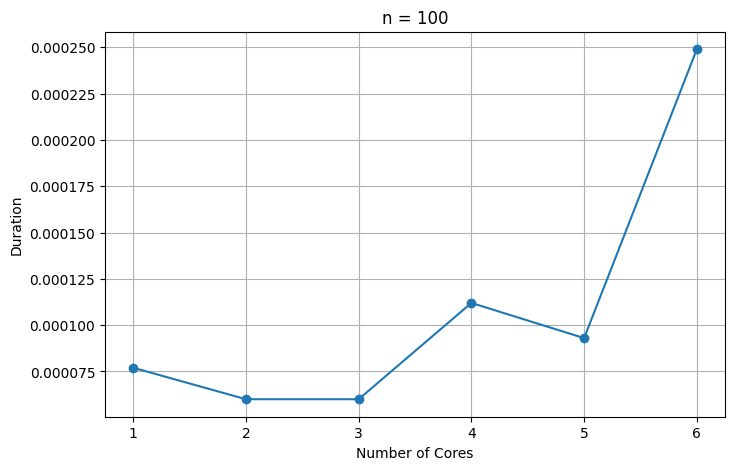

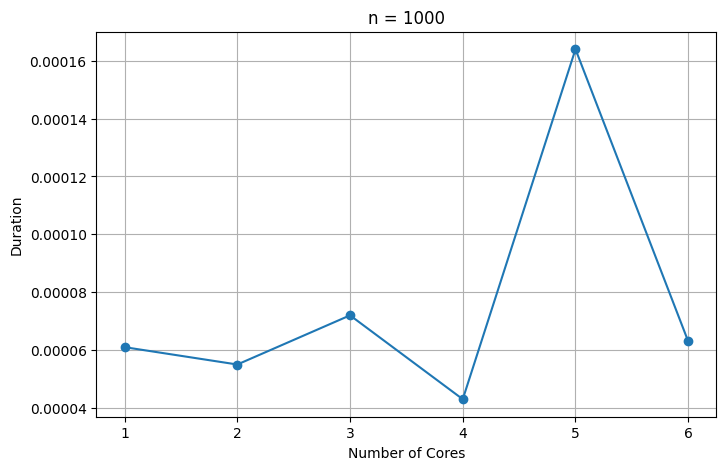

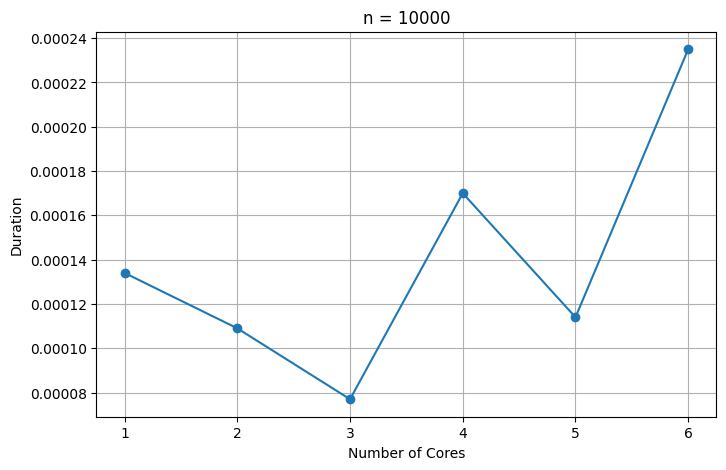

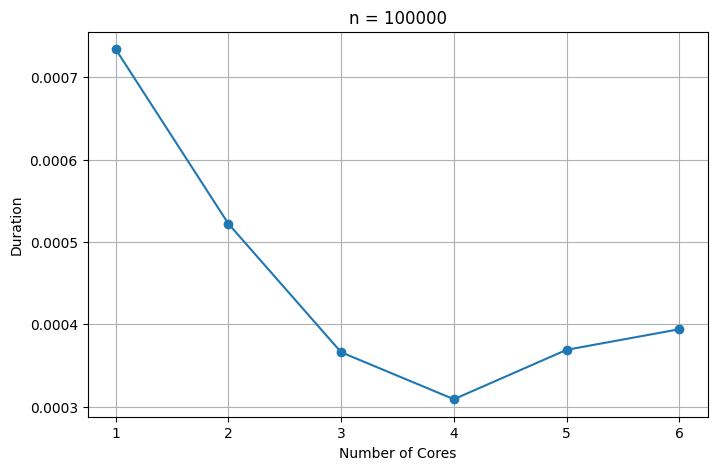

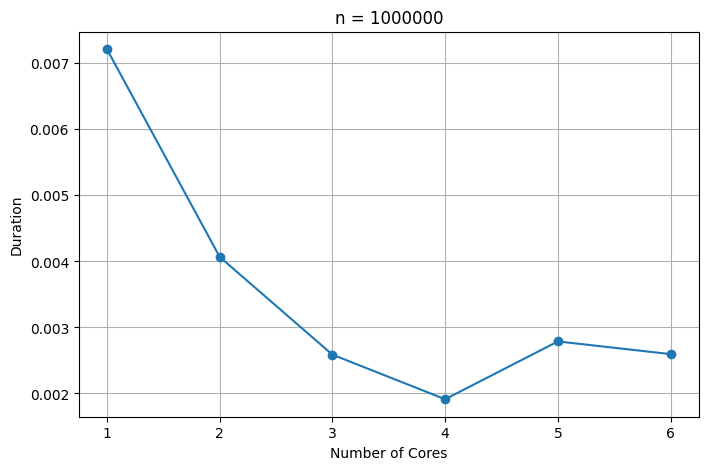

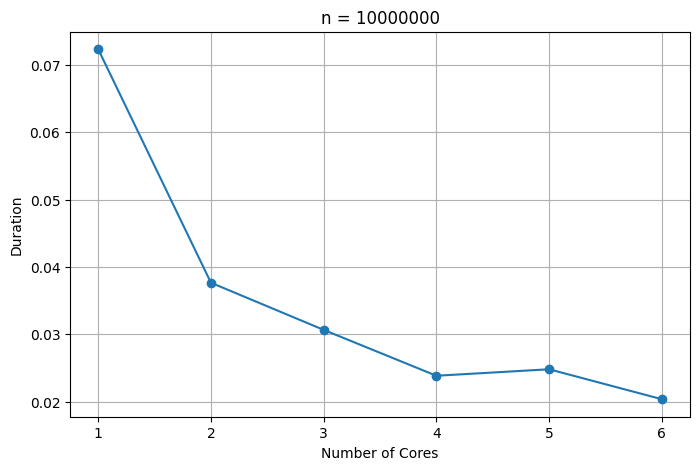

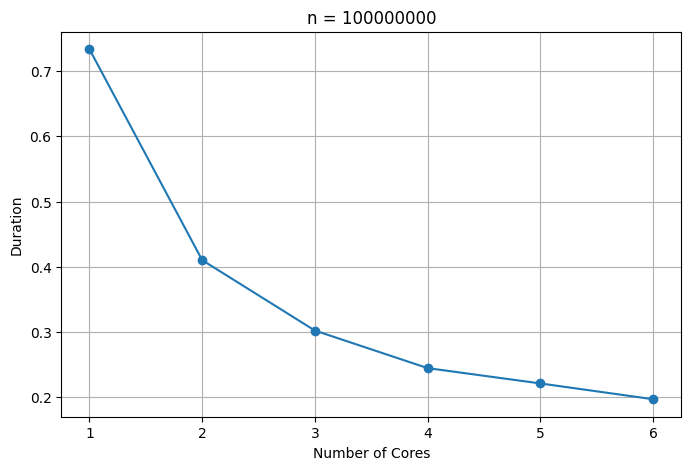

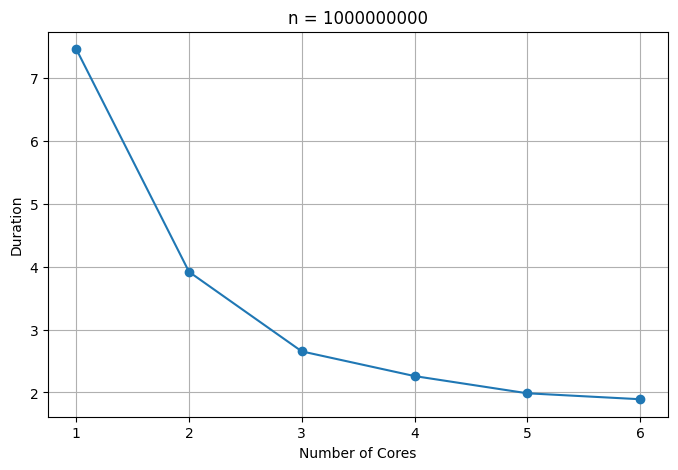

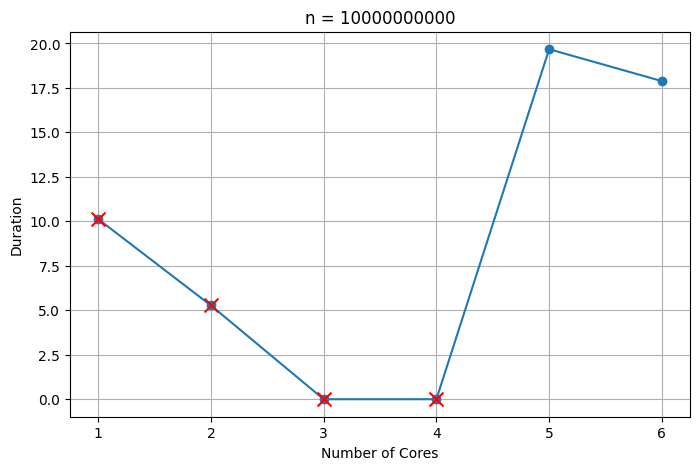

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

columns = ["core", "n", "ignore", "duration", "answer"]

# Read the data into a DataFrame
df = pd.read_csv(StringIO(data), delim_whitespace=True, names=columns)

# Get unique n values
unique_n_values = df["n"].unique()

# Loop through each unique n value and create a separate graph
for n in unique_n_values:
    subset = df[df["n"] == n]
    cores = subset["core"]
    durations = subset["duration"]
    answers = subset["answer"]

    # Create a plot
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot the line chart
    ax.plot(cores, durations, label=f'n={n}', marker='o', linestyle='-')

    # Highlight points with an "x" if answer < 0.96
    for core, duration, answer in zip(cores, durations, answers):
        if answer < 0.96:
            ax.scatter(core, duration, color='red', marker='x', s=100, zorder=5)  # Set zorder to ensure it's on top

    # Customize the chart
    ax.set_xlabel("Number of Cores")
    ax.set_ylabel("Duration")
    ax.set_title(f"n = {n}")
    ax.grid()
    plt.show()
